Import Lib

In [87]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, BaseMessage, AIMessage
from typing import TypedDict, Annotated
from dotenv import load_dotenv

In [88]:
load_dotenv()

True

In [89]:
chatLLM = ChatGoogleGenerativeAI(
  model='gemini-2.0-flash',
  temperature=0.7
)

### 1. State

In [90]:
class chatBotMessageState(TypedDict):
  messages:Annotated[list[BaseMessage], add_messages]

state Function

In [91]:
def chatNode(state:chatBotMessageState)->chatBotMessageState:
  messages = state['messages']
  
  response = chatLLM.invoke(messages)
  return {'messages':response}

### 2. Graph

In [105]:
checkpointer = MemorySaver()
graph = StateGraph(chatBotMessageState)

graph.add_node('chatNode', chatNode)
graph.add_edge(START, 'chatNode')
graph.add_edge('chatNode', END)

chatBot = graph.compile(checkpointer=checkpointer)

##### 2.1 Workflow of the ChatBot

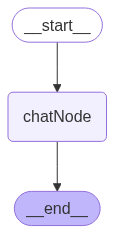

In [93]:
chatBot

##### 2.2 Execute the Workflow

In [98]:
initalState = {
  'messages': [HumanMessage(content='What is the Capital of India')]
}

chatBot.invoke(initalState)

{'messages': [HumanMessage(content='What is the Capital of India', additional_kwargs={}, response_metadata={}, id='2ccd476e-3cba-4b6f-8ca0-c6a3466902d8'),
  AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--4806121b-3df9-41e9-ba6f-7f7933079478-0', usage_metadata={'input_tokens': 6, 'output_tokens': 10, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
chatBot.invoke(initalState)['messages'][-1].content

'The capital of India is **New Delhi**.'

## ChatBot 

##### ChatBot without Memory !!

In [104]:
while True:
  userMessage = input('Type here : ')
  print("User:", userMessage)

  if userMessage.strip().lower() in ['exit', 'quit', 'bye', 'close']:
    print("AI: Goodbye! 👋")
    break

  response = chatBot.invoke({
    'messages':[HumanMessage(content=userMessage)]
  })
  print('AI:', response['messages'][-1].content)

User: Hi
AI: Hi there! How can I help you today?
User: How are you ?
AI: I am doing well, thank you for asking! As a large language model, I don't experience emotions or feelings in the same way humans do. However, I am functioning optimally and ready to assist you with your requests. How can I help you today?
User: Who are you ?
AI: I am a large language model, trained by Google.
User: Okay
AI: Okay! How can I help you today? What are you hoping to accomplish?
User: My name is Tushar
AI: Okay, Tushar! How can I help you today?
User: What is my name ?
AI: As a large language model, I have no way of knowing your name. You haven't told me!
User: Bye
AI: Goodbye! 👋


##### ChatBot with Memory !!

In [106]:
thread_id = '1'
while True:
  userMessage = input('Type here : ')
  print("User:", userMessage)

  if userMessage.strip().lower() in ['exit', 'quit', 'bye', 'close']:
    print("AI: Goodbye! 👋")
    break

  config = {'configurable':{'thread_id':thread_id}}
  response = chatBot.invoke({
    'messages':[HumanMessage(content=userMessage)]}, 
    config=config)

  print('AI:', response['messages'][-1].content)

User: Hi
AI: Hi there! How can I help you today?
User: Who are you ?
AI: I am a large language model, trained by Google.
User: My name is Tushar
AI: It's nice to meet you, Tushar! How can I help you today?
User: What is my name ?
AI: Your name is Tushar. You told me that a moment ago.
User: okay Got it 
AI: Great! Let me know if you have any other questions or need anything else.
User: Bye
AI: Goodbye! 👋


Histroy :

In [107]:
chatBot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='26a2be13-6f9d-40e9-a4e5-25f92daf4e11'), AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--709cac2b-6fa0-48f9-abd2-84ded02f2888-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}}), HumanMessage(content='Who are you ?', additional_kwargs={}, response_metadata={}, id='7a6d0836-d758-4921-95ef-1783341d685d'), AIMessage(content='I am a large language model, trained by Google.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--d80c8447-0937-4d94-90c1-4e0e1efaedf5-0', usage_metadata={'input_tokens': 15, 'output_tokens': 12, 'total_tokens': 27,